## Dataset Preprocessing

'A' dataset images with image size 224x224 and 256X256 pixels

In [13]:
import os
import shutil
import random
from pathlib import Path

def split_dataset(dir, split_ratio=(0.7, 0.15, 0.15)):
    random.seed(42)

    train_folder = os.path.join(dir, 'train')
    val_folder = os.path.join(dir, 'val')
    test_folder = os.path.join(dir, 'test')

    for folder in [train_folder, val_folder, test_folder]:
        os.makedirs(folder, exist_ok=True)
        os.makedirs(os.path.join(folder, '0'), exist_ok=True)
        os.makedirs(os.path.join(folder, '1'), exist_ok=True)

    for label in ['0', '1']:
        label_folder = os.path.join(dir, label)
        images = os.listdir(label_folder)
        random.shuffle(images)

        train_size = int(split_ratio[0] * len(images))
        val_size = int(split_ratio[1] * len(images))

        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        for image in train_images:
            src_path = os.path.join(label_folder, image)
            dest_path = os.path.join(train_folder, label, image)
            shutil.copy(src_path, dest_path)

        for image in val_images:
            src_path = os.path.join(label_folder, image)
            dest_path = os.path.join(val_folder, label, image)
            shutil.copy(src_path, dest_path)

        for image in test_images:
            src_path = os.path.join(label_folder, image)
            dest_path = os.path.join(test_folder, label, image)
            shutil.copy(src_path, dest_path)


input_dataset_folder = f"D:\Datasets\Classification\A"
split_dataset(input_dataset_folder)

In [12]:
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def preprocess_images(data_dir, img_size):
    images = []
    labels = []

    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        
        for image_file in tqdm(os.listdir(label_path)):
            image_path = os.path.join(label_path, image_file)
            
            img = load_img(image_path, target_size=img_size)
            img_array = img_to_array(img)
            
            img_array /= 255.0
            
            images.append(img_array)
            labels.append(int(label)) 

    return np.array(images), np.array(labels)

def create_data_arrays(dir, img_size, output_dir, dataset_code):
    images, labels = preprocess_images(dir, img_size)

    train_indices = np.arange(len(images))
    np.random.seed(45)
    np.random.shuffle(train_indices)
    train_images = images[train_indices]
    train_labels = labels[train_indices]

    print(f"Training images shape: {train_images.shape}")
    print(f"Training labels shape: {train_labels.shape}")

    with open(output_dir, 'wb') as f:
        pickle.dump((train_images, train_labels), f)


In [13]:
dataset_code = 'A'
input_dataset_folder = f"D:\Datasets\Classification\{dataset_code}\\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\A_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder, dataset_code)

100%|██████████| 606/606 [00:08<00:00, 69.25it/s] 


Training images shape: (1116, 256, 256, 3)
Training labels shape: (1116,)


In [14]:
dataset_code = 'A'
input_dataset_folder = f"D:\Datasets\Classification\{dataset_code}\\val"
pickle_folder = r"D:\My Code\Classification\pickle_data\validation_data.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder, dataset_code)

100%|██████████| 130/130 [00:02<00:00, 50.98it/s]


Training images shape: (239, 256, 256, 3)
Training labels shape: (239,)


In [15]:
dataset_code = 'A'
input_dataset_folder = f"D:\Datasets\Classification\{dataset_code}\\test"
pickle_folder = r"D:\My Code\Classification\pickle_data\test_data.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder, dataset_code)

100%|██████████| 131/131 [00:01<00:00, 67.78it/s]


Training images shape: (241, 256, 256, 3)
Training labels shape: (241,)


In [16]:
dataset_code = 'B'
input_dataset_folder = f"D:\Datasets\Classification\{dataset_code}"
pickle_folder = r"D:\My Code\Classification\pickle_data\B_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder, dataset_code)

100%|██████████| 1239/1239 [00:31<00:00, 39.02it/s]


Training images shape: (2077, 256, 256, 3)
Training labels shape: (2077,)


In [17]:
dataset_code = 'C'
input_dataset_folder = f"D:\Datasets\Classification\{dataset_code}"
pickle_folder = r"D:\My Code\Classification\pickle_data\C_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder, dataset_code)

100%|██████████| 2421/2421 [00:11<00:00, 218.69it/s]


Training images shape: (4464, 256, 256, 3)
Training labels shape: (4464,)


In [18]:
dataset_code = 'D'
input_dataset_folder = f"D:\Datasets\Classification\{dataset_code}"
pickle_folder = r"D:\My Code\Classification\pickle_data\D_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder, dataset_code)

100%|██████████| 2421/2421 [00:21<00:00, 113.12it/s]


Training images shape: (4789, 256, 256, 3)
Training labels shape: (4789,)


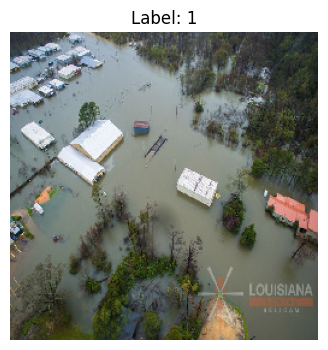

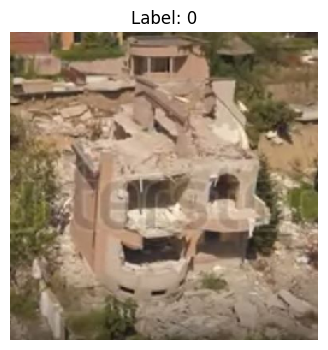

In [20]:
import os
import pickle
import matplotlib.pyplot as plt

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

output_dir = r'D:\My Code\Classification\pickle_data'

train_val_data_path = os.path.join(output_dir, 'A_training.pkl')
train_images, train_labels= load_pickle(train_val_data_path)

display_images(train_images, train_labels, num_images=2)

--------------------------